In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

---

# PLOT 2: HEAT MAP / VERTICAL BAR PLOT

---

Focusing only on Dataset 1, we can make an analysis of the level of education that population has in each district. We will represent this with a heat map. 

In [72]:
# We read the data
df=pd.read_csv('generated_data/education_percentages_1997-2025.csv')

# We order the districts from low to high rent
district_order=[
    "Nou Barris",
    "Ciutat Vella", 
    "Sant Andreu",
    "Sants-Montjuïc",
    "Horta-Guinardó",
    "Sant Martí",
    "Gràcia",
    "Eixample", 
    "Les Corts",
    "Sarrià-Sant Gervasi" 
]

# We order the education levels from high to low
education_order=[
    'Tertiary education',
    'Upper secondary or post-secondary non-tertiary education',
    'Lower secondary education',
    'Primary education', 
    'Less than primary education' 
]

# We change to shorter names
names_y=[
    'Tertiary',
    'Upper secondary',
    'Lower secondary',
    'Primary',
    'Less than primary'
]

# We create a folder to save the plots
os.makedirs("outputs/results_plot2", exist_ok=True)

# We create a list with the years
years=sorted(df['Year_Reference'].unique())

for year in years:

    # We obtain the df for that year
    df_year=df[df['Year_Reference']==year].copy()
    
    # We redistribute the dataframe for the heatmap
    heatmap_df = df_year.pivot_table(
        index='Education_Level', #rows
        columns='District',
        values='Percentage',
    ).fillna(0)
    
    # We don't want to plot the not available
    if 'Not available' in heatmap_df.index:
        heatmap_df=heatmap_df.drop('Not available')
    
    # We reorder the axis values
    heatmap_df=heatmap_df.reindex(education_order)
    heatmap_df=heatmap_df[district_order]
    
    # We create the heatmap
    plt.figure(figsize=(10, 5))
    ax=sns.heatmap(
        heatmap_df,
        annot=True,
        fmt='.1f',
        cmap='viridis',
        linewidths=0.5,
        cbar_kws={'label': 'Porcentaje (%)'},
        vmin=0,  
        vmax=60   
    )
    cbar=ax.collections[0].colorbar
    cbar.set_label('Population (%)', fontweight='bold', fontsize=12)

    plt.text(
        0.99, 1.05,               
        f"{year}",            
        ha='right', va='center',
        transform=plt.gca().transAxes,
        fontsize=12,
        fontweight='bold'
    )
    
    plt.xlabel('District (from lowest to highest income)', fontsize=12, fontweight='bold')
    plt.ylabel('Educational level', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(education_order)) + 0.5, labels=names_y, rotation=0)
    plt.tight_layout()
    
    # We save the plot in the folder
    plt.savefig(os.path.join("outputs/results_plot2", f"plot2_{year}.png"), dpi=300, bbox_inches='tight')
    plt.close()

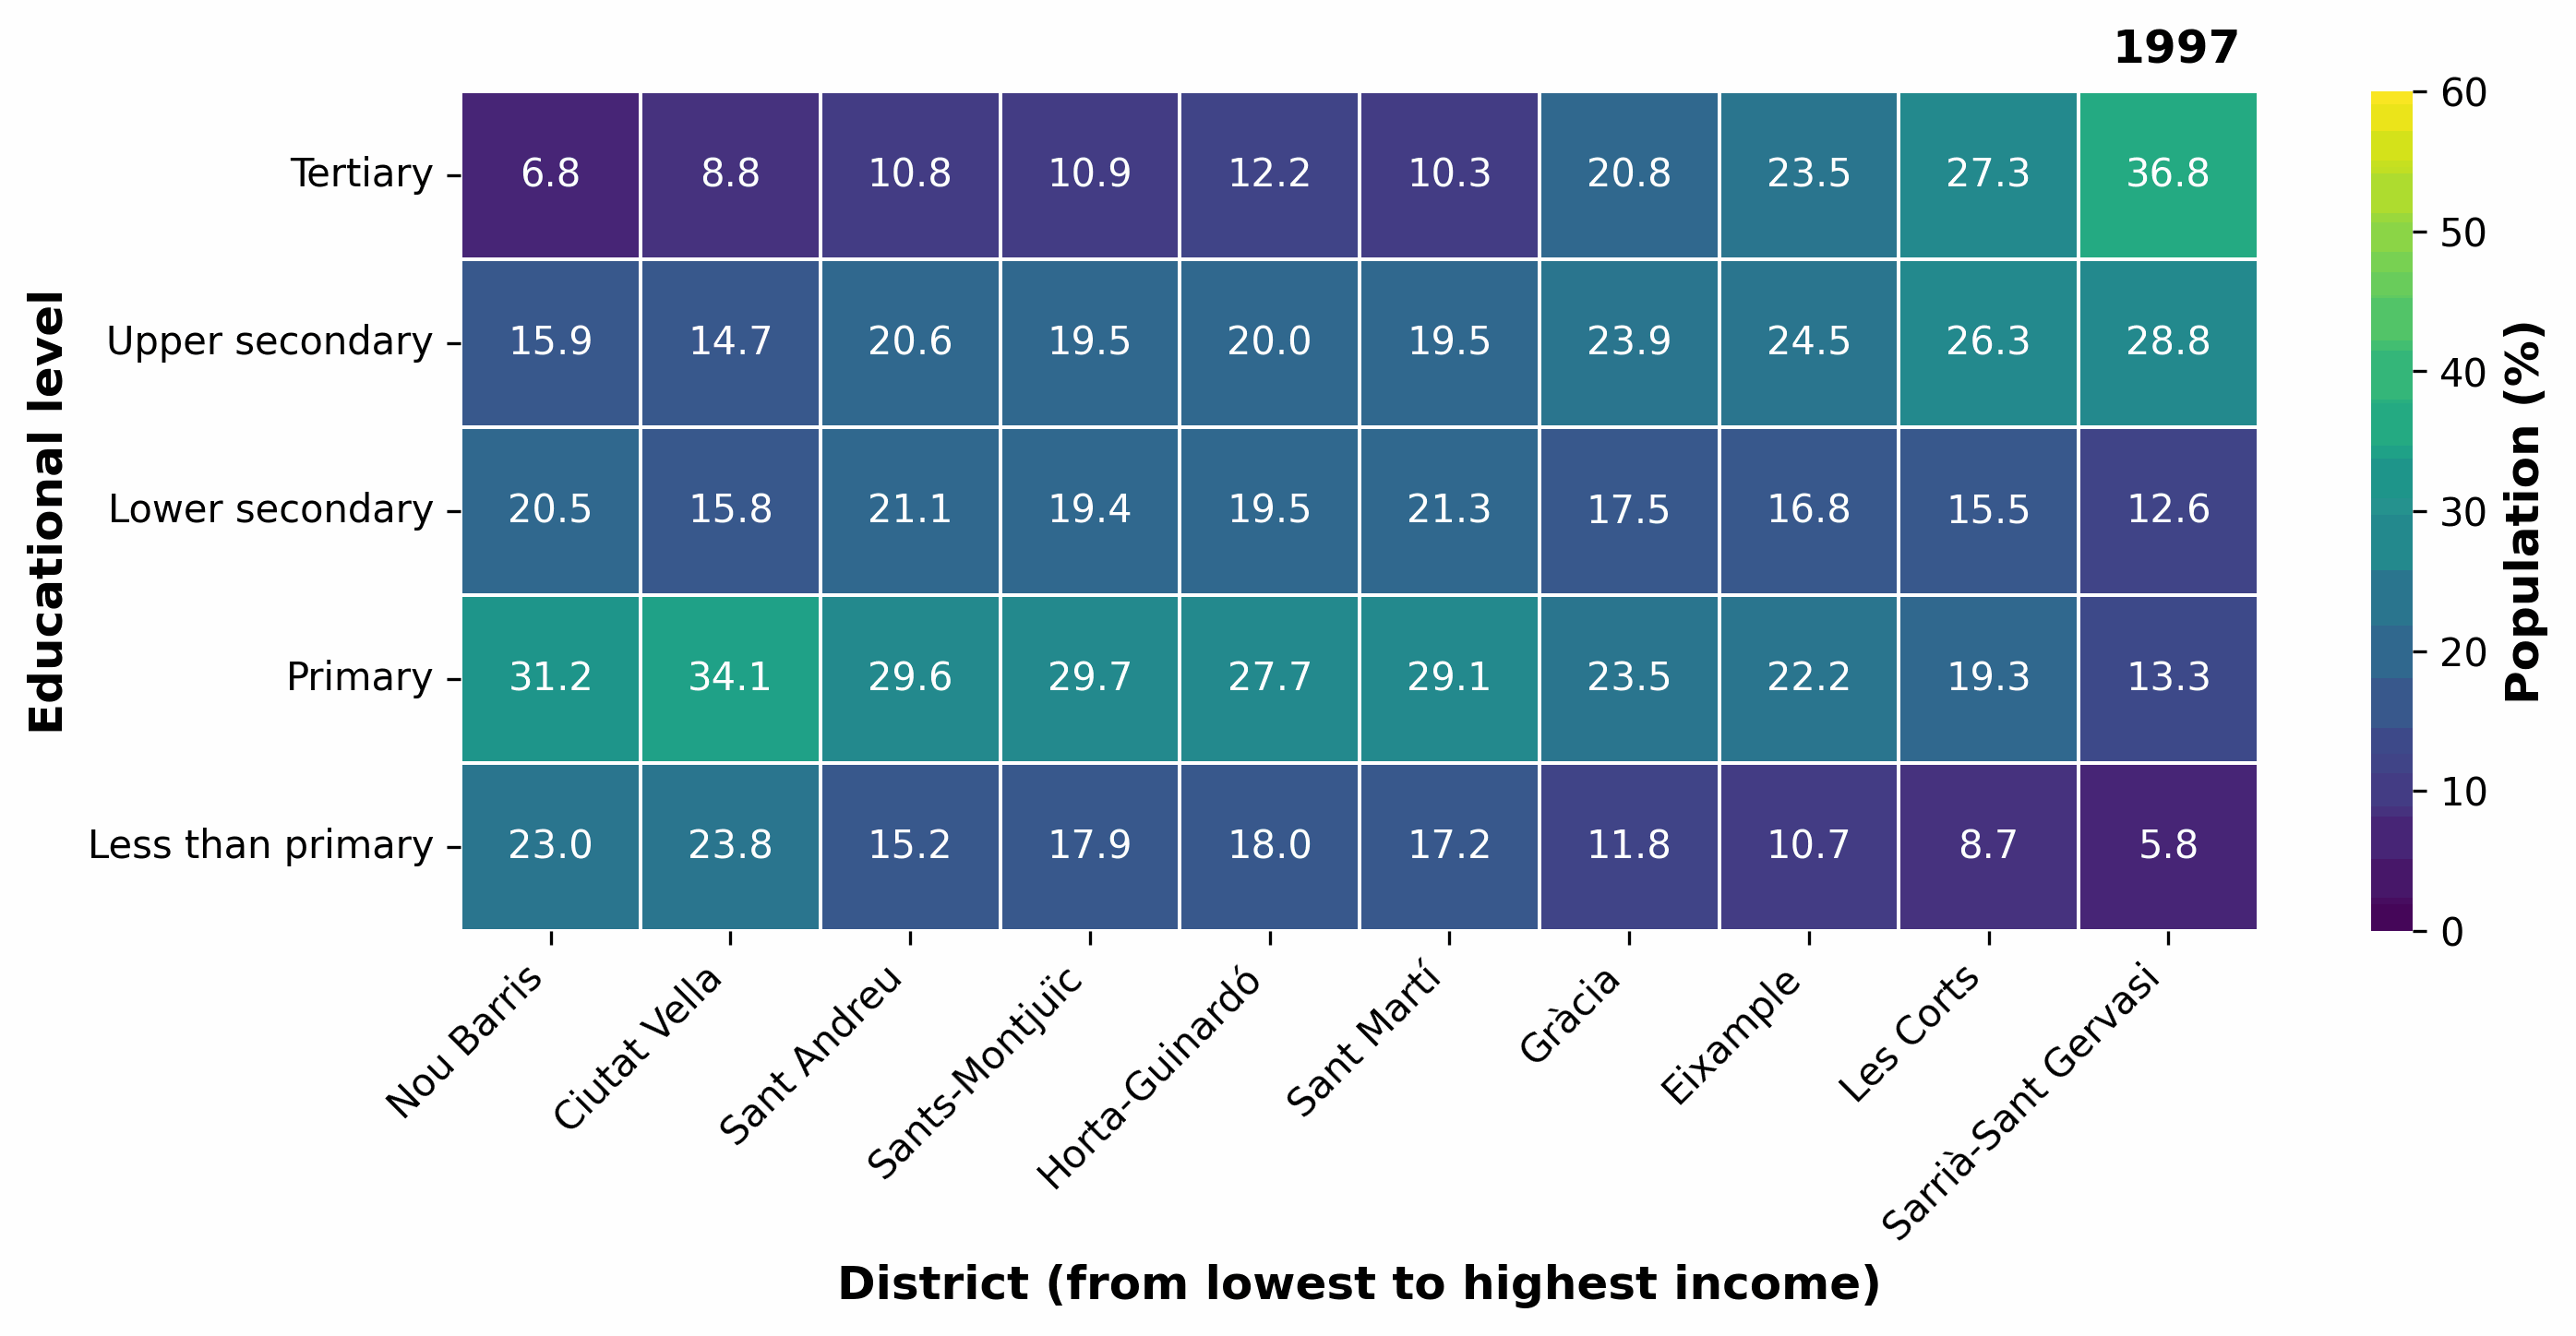

In [73]:
from PIL import Image

# We create a gif over the years
frames_dir="outputs/results_plot2"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "outputs/plot2.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="outputs/plot2.gif"))

We can also represent this information with a bar map:

In [69]:
# Folder to save the plots
os.makedirs("outputs/results_plot3", exist_ok=True)

# Let's order the districts from low to high rent
order_districts=[
    "Nou Barris",
    "Ciutat Vella", 
    "Sant Andreu",
    "Sants-Montjuïc",
    "Horta-Guinardó",
    "Sant Martí",
    "Gràcia",
    "Eixample", 
    "Les Corts",
    "Sarrià-Sant Gervasi" 
]

# Let's order the education levels from low to high
orden_educacion=[
    'Not available',
    'Less than primary education',
    'Primary education', 
    'Lower secondary education',
    'Upper secondary or post-secondary non-tertiary education',
    'Tertiary education'
]

# We change to shorter names
names_y={
    'Not available':'Not available',
    'Tertiary education': 'Tertiary',
    'Upper secondary or post-secondary non-tertiary education': 'Upper secondary',
    'Lower secondary education': 'Lower secondary',
    'Primary education': 'Primary',
    'Less than primary education': 'Less than primary'
}

viridis_colors=plt.cm.viridis(np.linspace(0, 1, 6))
colors=[viridis_colors[0],viridis_colors[1], viridis_colors[2],viridis_colors[3], viridis_colors[4],viridis_colors[5]]

# List with the years
years=sorted(df['Year_Reference'].unique())

for year in years:

    df_year = df[df['Year_Reference']==year].copy()
    
    # We reorganize the dataframe
    df_barmap=df_year.pivot_table(
        index='District',
        columns='Education_Level',
        values='Percentage',
    ).fillna(0)
    
    # We reorder from low to high rent
    df_barmap=df_barmap.reindex(order_districts)
    df_barmap=df_barmap[orden_educacion]
    
    # We create the plot
    fig, ax=plt.subplots(figsize=(10, 5))
    bottoms=np.zeros(len(df_barmap))
    for i, column in enumerate(df_barmap.columns):
        ax.bar(df_barmap.index, df_barmap[column], bottom=bottoms,
               label=column, color=colors[i], alpha=1)
        bottoms+=df_barmap[column]
    
    ax.set_ylabel('Population (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Districts (from lowest to highest income)', fontsize=1, fontweight='bold')
    
    leg=ax.legend(
        [names_y.get(l, l) for l in df_barmap.columns], 
        bbox_to_anchor=(1.03, 1), 
        loc='upper left', 
        title='Educational level', 
        title_fontsize=12, 
        frameon=False
    )
    leg.get_title().set_fontweight('bold')

    plt.text(
        0.99, 1.05,               
        f"{year}",            
        ha='right', va='center',
        transform=plt.gca().transAxes,
        fontsize=12,
        fontweight='bold'
    )
    
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y',linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # We save the plot
    plt.savefig(os.path.join("outputs/results_plot3", f"plot3_{year}.png"), dpi=300, bbox_inches='tight')
    plt.close()


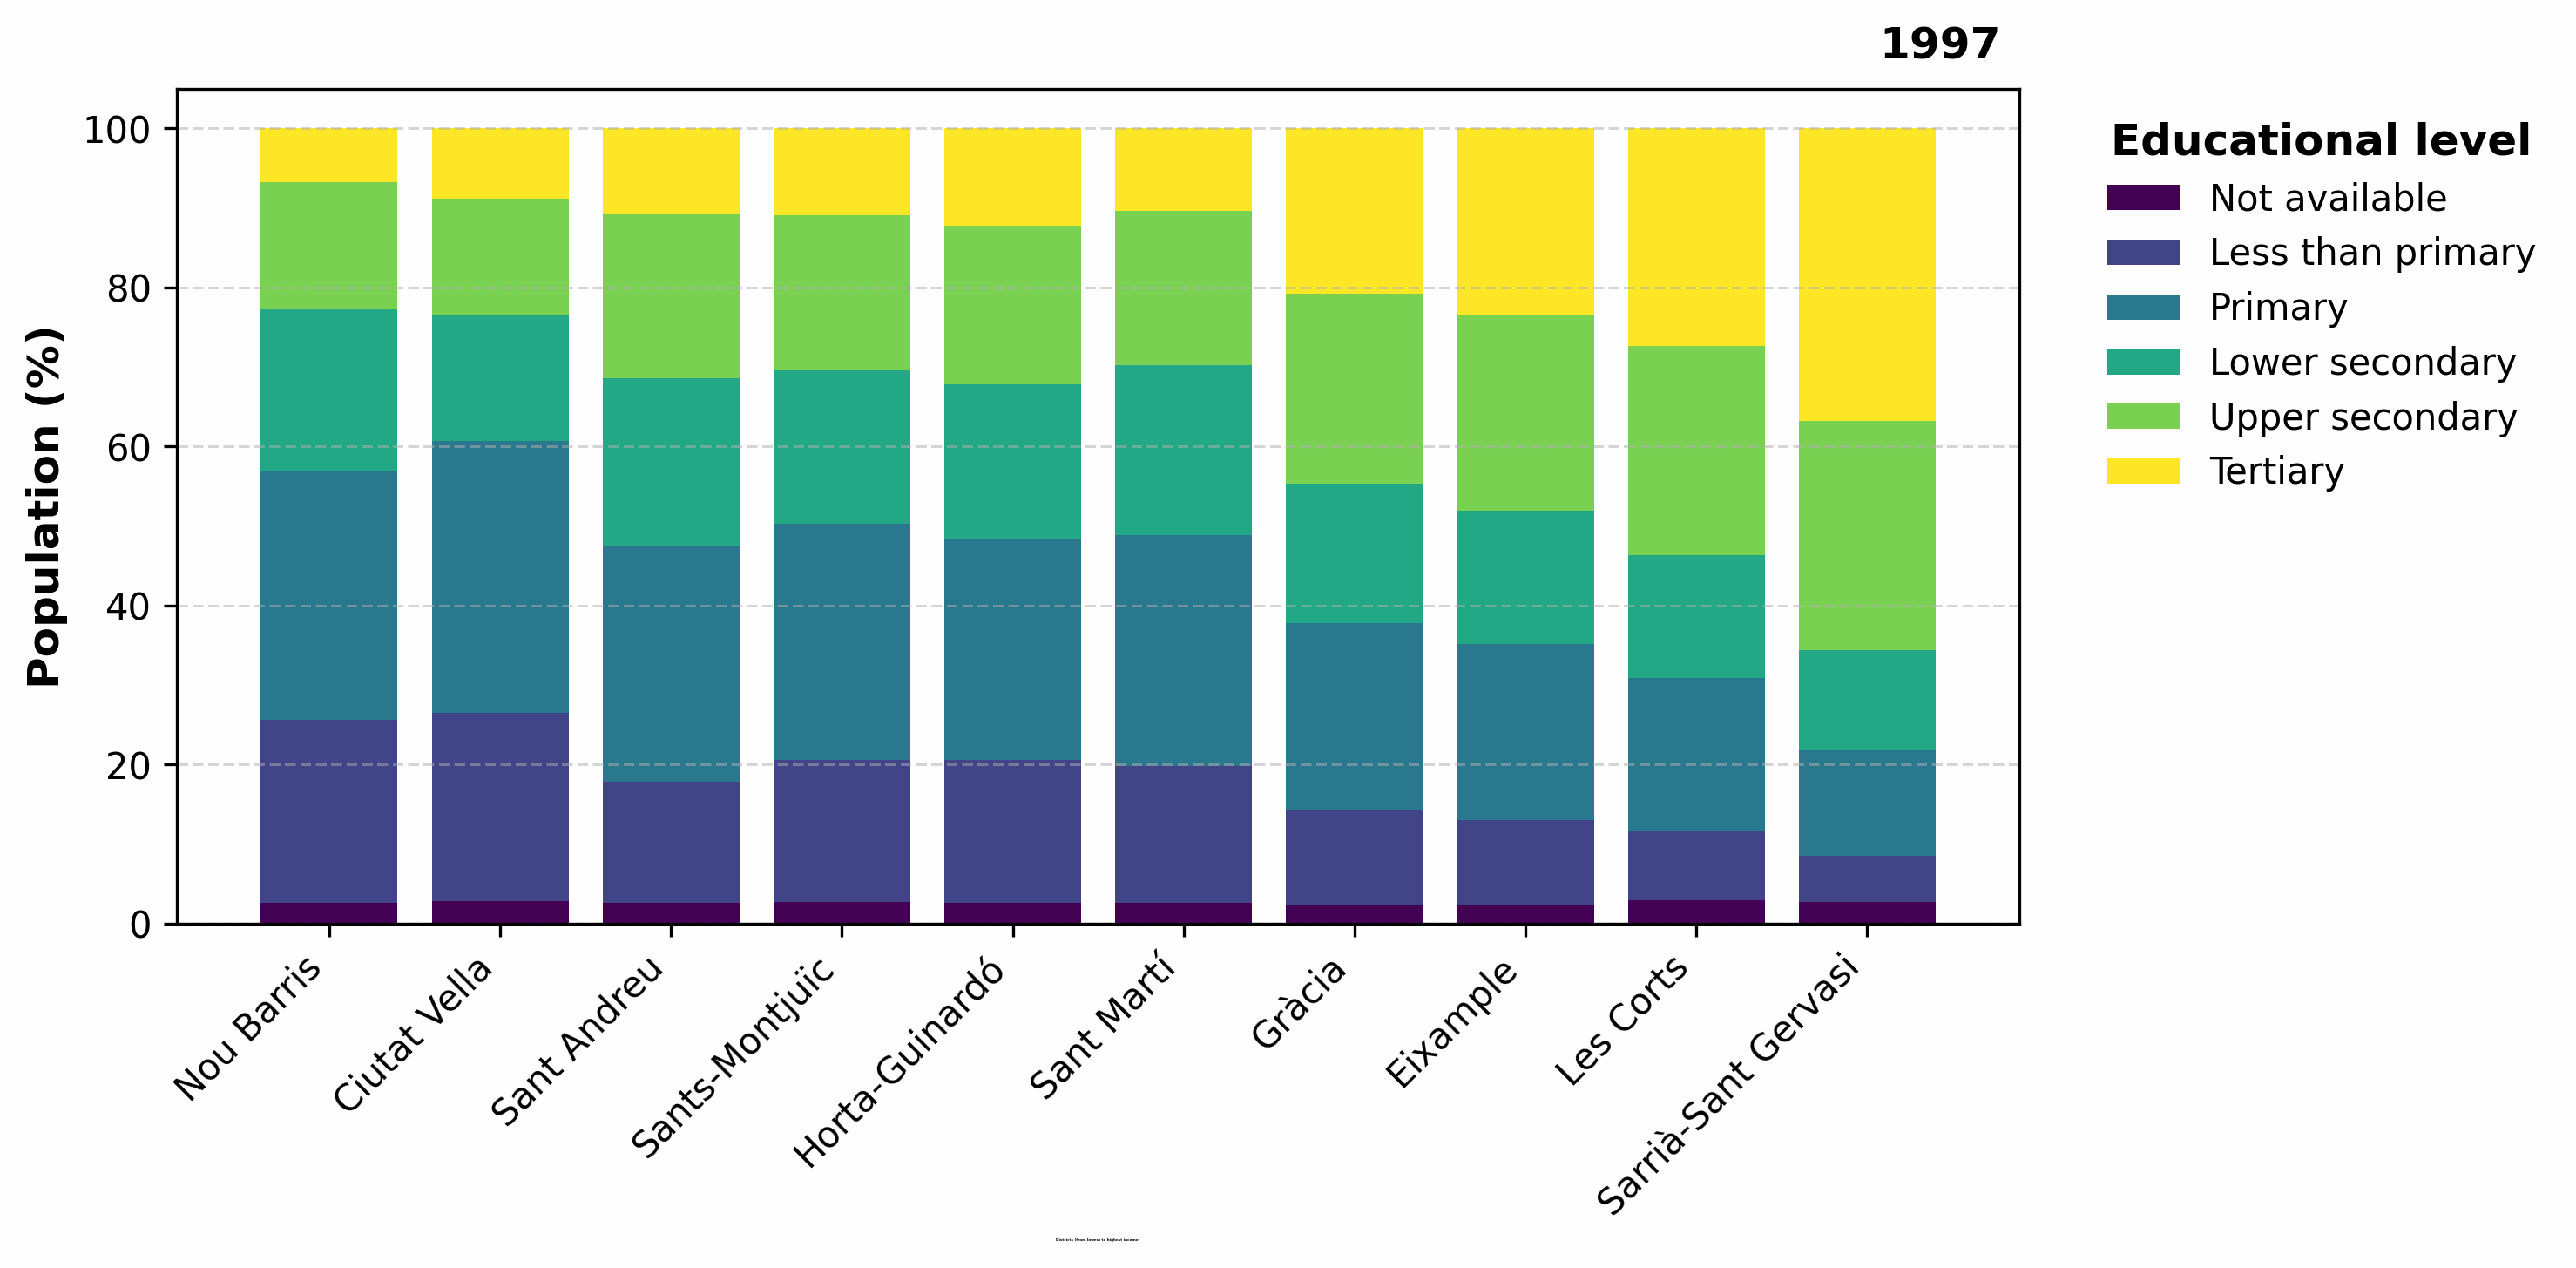

In [70]:
from PIL import Image

# We create a gif over the years
frames_dir="outputs/results_plot3"
files=sorted([f for f in os.listdir(frames_dir) if f.endswith(".png")])
frame_files=[os.path.join(frames_dir, f) for f in files]

frames=[Image.open(f) for f in frame_files]

frames[0].save(
    "outputs/plot3.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,   
    loop=0
)

from IPython.display import Image, display

display(Image(filename="outputs/plot3.gif"))

Instead of doing a gif we can plot the first and last year to see the evolution:

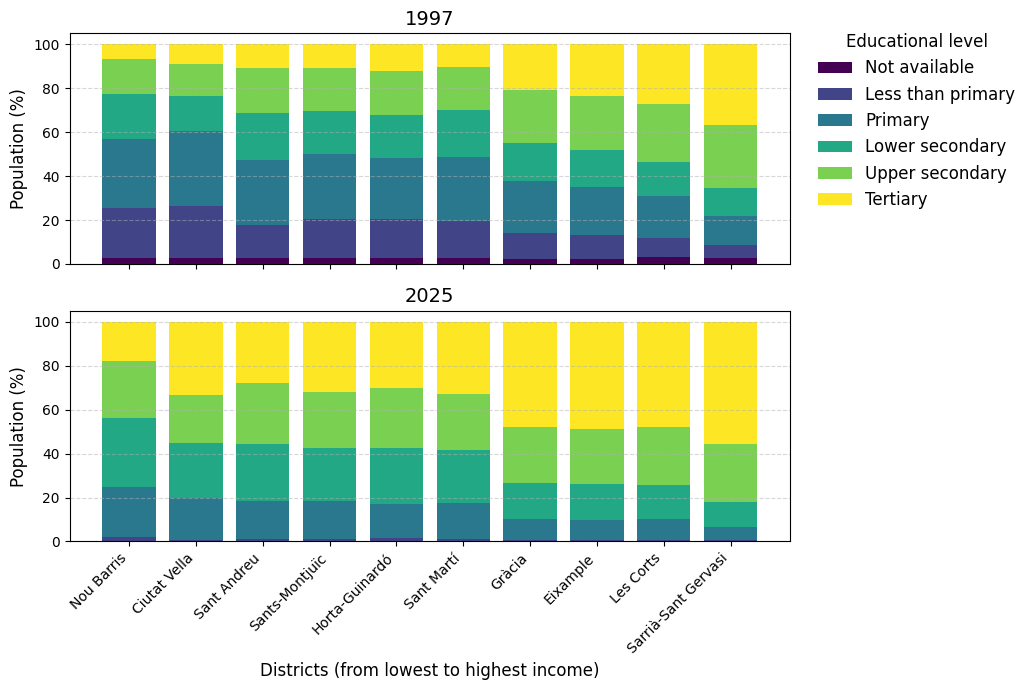

In [71]:
# We group the population by years, districts and level of education
group=df.groupby(['Year_Reference', 'District', 'Education_Level'])['Value'].sum().reset_index()

# We group now the population by years and districts (all levels of education). We have to include also the not available.
total_per_district=group.groupby(['Year_Reference', 'District'])['Value'].sum().reset_index()
total_per_district.rename(columns={'Value': 'Total_District'}, inplace=True)

# We group both dataframes and obtain percentages
df=pd.merge(group, total_per_district, on=['Year_Reference', 'District'])
df['Percentage']=(df['Value']/df['Total_District'])*100

# Order the districts from low to high rent
order_districts=[
    "Nou Barris",
    "Ciutat Vella", 
    "Sant Andreu",
    "Sants-Montjuïc",
    "Horta-Guinardó",
    "Sant Martí",
    "Gràcia",
    "Eixample", 
    "Les Corts",
    "Sarrià-Sant Gervasi"
]

# Order education levels
orden_educacion=[
    'Not available',
    'Less than primary education',
    'Primary education', 
    'Lower secondary education',
    'Upper secondary or post-secondary non-tertiary education',
    'Tertiary education'
]

# Short names for legend
names_y={
    'Not available':'Not available',
    'Tertiary education':'Tertiary',
    'Upper secondary or post-secondary non-tertiary education':'Upper secondary',
    'Lower secondary education':'Lower secondary',
    'Primary education':'Primary',
    'Less than primary education':'Less than primary'
}

# Viridis colors
viridis_colors=plt.cm.viridis(np.linspace(0, 1, 6))
colors=[viridis_colors[i] for i in range(6)]


# Years you want
years_to_plot=[1997, 2025]

# Figure with 2 rows
fig, axes=plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(9, 7),
    sharex=True
)

for ax, year in zip(axes, years_to_plot):

    df_year=df[df['Year_Reference'] == year].copy()

    df_barmap=df_year.pivot_table(
        index='District',
        columns='Education_Level',
        values='Percentage'
    ).fillna(0)

    df_barmap=df_barmap.reindex(order_districts)
    df_barmap=df_barmap[orden_educacion]

    bottoms=np.zeros(len(df_barmap))
    for i, column in enumerate(df_barmap.columns):
        ax.bar(
            df_barmap.index,
            df_barmap[column],
            bottom=bottoms,
            label=names_y[column],
            color=colors[i],
            alpha=1
        )
        bottoms+=df_barmap[column]

    ax.set_ylabel("Population (%)", fontsize=12)
    ax.set_title(f"{year}", fontsize=14, loc="center")

    ax.grid(axis='y', linestyle='--', alpha=0.5)

axes[-1].set_xlabel("Districts (from lowest to highest income)",
                    fontsize=12)
plt.xticks(rotation=45, ha="right")

handles, labels=axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Educational level",
    title_fontsize=12,
    fontsize=12,
    loc="center right",
    bbox_to_anchor=(1.15, 0.82),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.90, 1]) 

plt.savefig('outputs/plot3.png', dpi=300, bbox_inches='tight')
plt.show()